<a href="https://colab.research.google.com/github/nandhakumar-v-19/Earthquake_Damage_Prediction/blob/main/Earthquake_Damage_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
### **Tasks Covered**
'''
1. Full EDA Report
2. Predictive Model for `damage_grade`
3. Model Comparison Report
4. Challenges Report
5. Suggestions for Seismologists
'''


'\n1. Full EDA Report\n2. Predictive Model for `damage_grade`\n3. Model Comparison Report\n4. Challenges Report\n5. Suggestions for Seismologists\n'

# **Import Required Libraries**
This section imports all the necessary Python libraries for data processing, visualization, and machine learning.

In [2]:
# Basic utilities
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, f1_score

# Models
!pip install catboost
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

import warnings
warnings.filterwarnings("ignore")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.3 MB/s eta 0:00:00


In [3]:
!pip install catboost xgboost lightgbm --quiet

# **Load Dataset & Merge Files**
We load:
- train_values.csv (building features)
- train_labels.csv (damage grade)
Then we merge them using building_id.

In [5]:
import pandas as pd

train_values = pd.read_csv("train_values.csv")
train_labels = pd.read_csv("train_labels.csv")

# Merge
df = train_values.merge(train_labels, on="building_id", how="left")

df.head()


,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


# **FULL EDA REPORT**

## ***Dataset Overview***

In [6]:
print("Shape:", df.shape)
df.info()
df.describe()


Shape: (104903, 40)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104903 entries, 0 to 104902
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   building_id                             104903 non-null  int64  
 1   geo_level_1_id                          104903 non-null  int64  
 2   geo_level_2_id                          104903 non-null  int64  
 3   geo_level_3_id                          104903 non-null  int64  
 4   count_floors_pre_eq                     104903 non-null  int64  
 5   age                                     104903 non-null  int64  
 6   area_percentage                         104903 non-null  int64  
 7   height_percentage                       104903 non-null  int64  
 8   land_surface_condition                  104903 non-null  object 
 9   foundation_type                         104903 non-null  object 
 10  roof_type               

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,1.049030e+05,104903.000000,104903.000000,104903.000000,104903.000000,104903.000000,104903.000000,104903.000000,104902.000000,104902.000000,...,104902.000000,104902.000000,104902.000000,104902.000000,104902.000000,104902.000000,104902.000000,104902.000000,104902.000000,104903.000000
mean,5.262882e+05,13.921651,700.247524,6260.367158,2.129100,26.299057,8.022383,5.438681,0.088349,0.762035,...,0.034013,0.007750,0.000839,0.000362,0.001230,0.000200,0.000095,0.000105,0.004881,2.239659
std,3.047753e+05,8.015148,412.046036,3649.056012,0.727582,72.012400,4.409739,1.927860,0.283803,0.425840,...,0.181263,0.087693,0.028951,0.019029,0.035046,0.014147,0.009763,0.010240,0.069692,0.611714
min,4.000000e+00,0.000000,0.000000,3.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.621010e+05,7.000000,352.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,5.257370e+05,12.000000,700.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,7.911460e+05,21.000000,1047.000000,9414.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.052934e+06,30.000000,1427.000000,12565.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


## ***Missing Value Analysis***

In [7]:
# Missing Values
missing = df.isnull().sum().sort_values(ascending=False)
missing[missing > 0]

,0
has_superstructure_mud_mortar_stone,1
has_superstructure_stone_flag,1
has_superstructure_cement_mortar_stone,1
has_superstructure_mud_mortar_brick,1
other_floor_type,1
position,1
plan_configuration,1
has_superstructure_adobe_mud,1
has_secondary_use_institution,1
has_secondary_use_school,1


## ***Target Variable Distribution (damage_grade)***

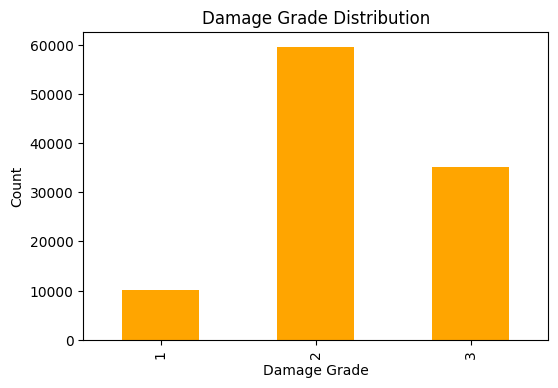

In [8]:
plt.figure(figsize=(6,4))
df['damage_grade'].value_counts().sort_index().plot(kind='bar', color='orange')
plt.title("Damage Grade Distribution")
plt.xlabel("Damage Grade")
plt.ylabel("Count")
plt.show()

## ***Numerical Feature Distribution***

In [9]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols.remove('damage_grade')  # remove target
numeric_cols.remove('building_id')   # not useful for ML

categorical_cols, numeric_cols[:10]

(['land_surface_condition',
  'foundation_type',
  'roof_type',
  'ground_floor_type',
  'other_floor_type',
  'position',
  'plan_configuration',
  'legal_ownership_status'],
 ['geo_level_1_id',
  'geo_level_2_id',
  'geo_level_3_id',
  'count_floors_pre_eq',
  'age',
  'area_percentage',
  'height_percentage',
  'has_superstructure_adobe_mud',
  'has_superstructure_mud_mortar_stone',
  'has_superstructure_stone_flag'])

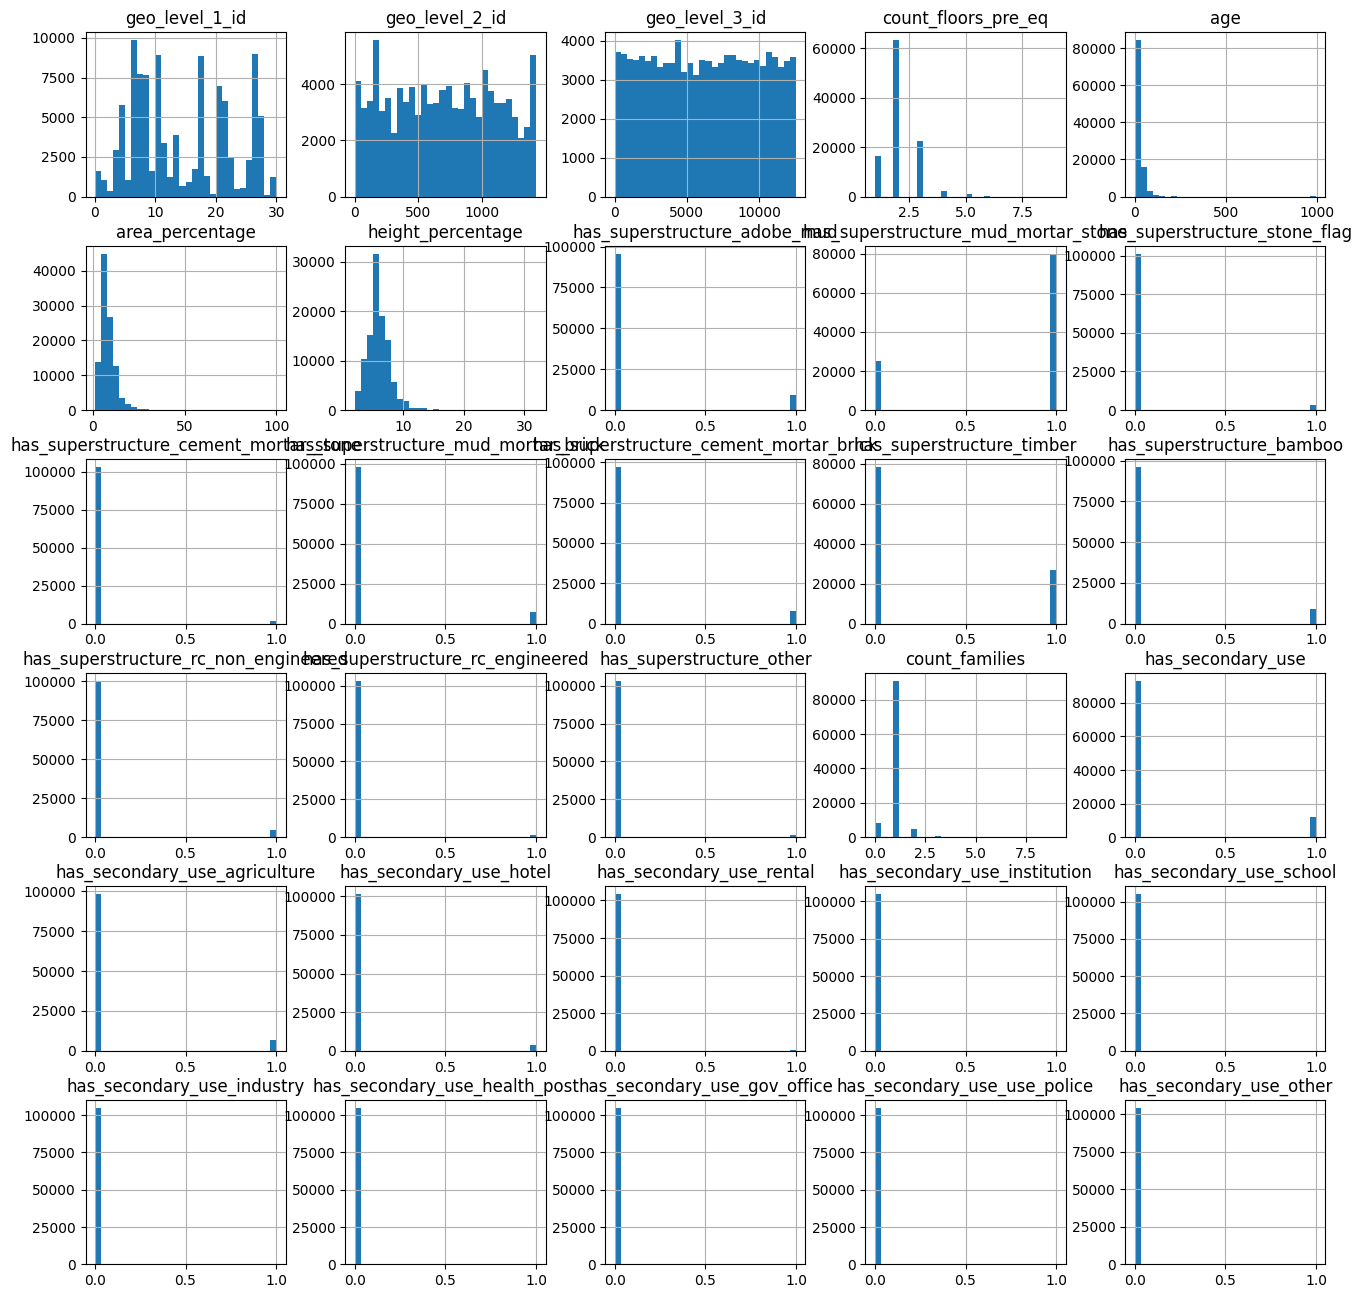

In [10]:
df[numeric_cols].hist(figsize=(16,16), bins=30)
plt.show()

## ***Categorical Feature Distribution***

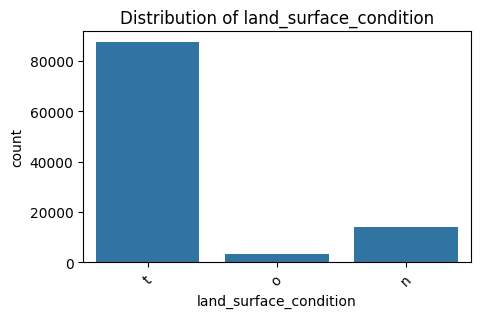

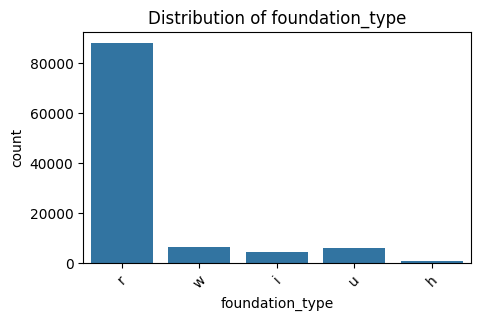

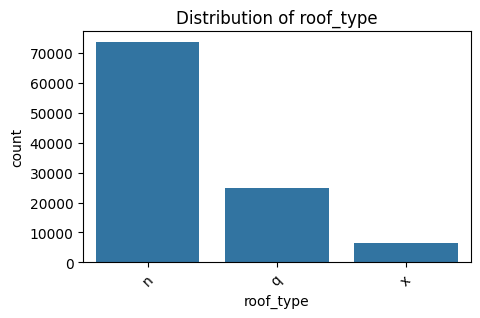

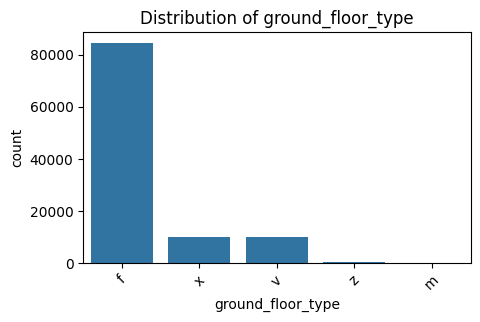

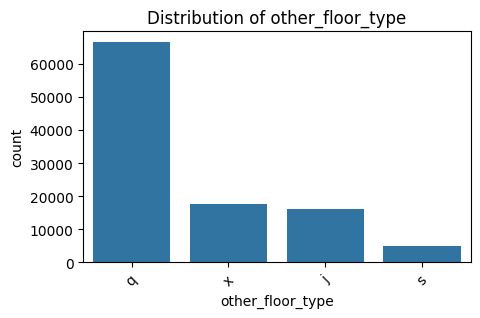

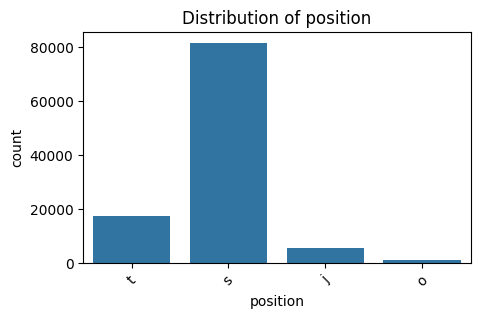

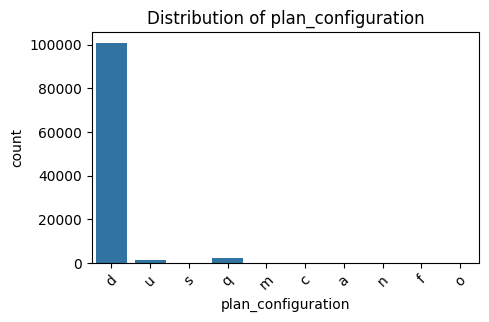

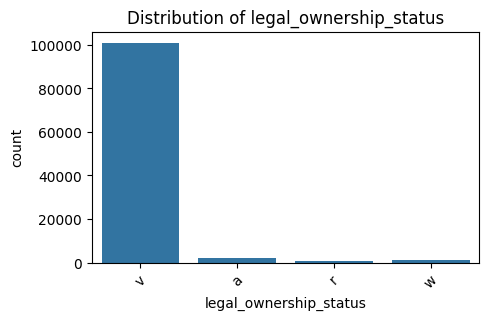

In [11]:
for col in categorical_cols:
    plt.figure(figsize=(5,3))
    sns.countplot(data=df, x=col)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

## ***Numeric vs Damage Grade***

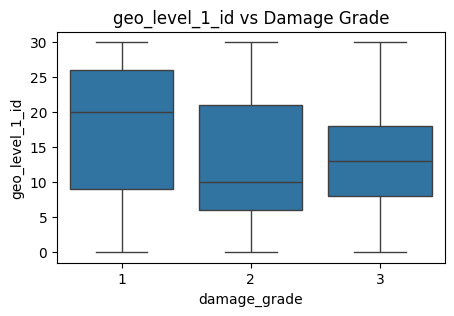

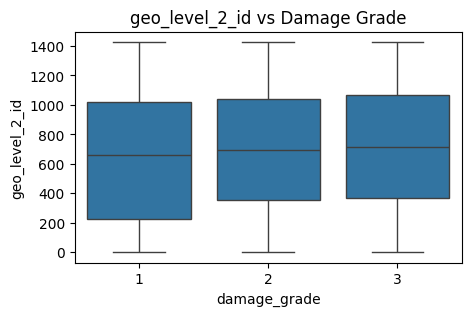

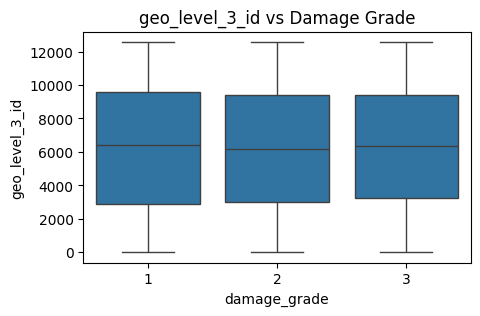

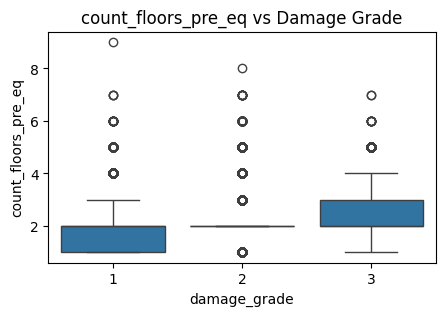

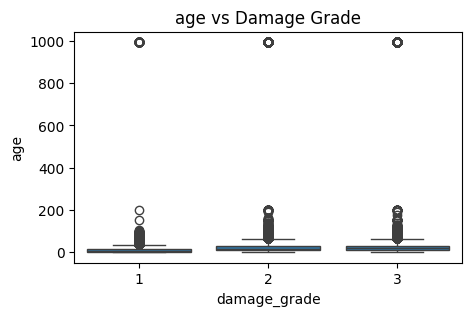

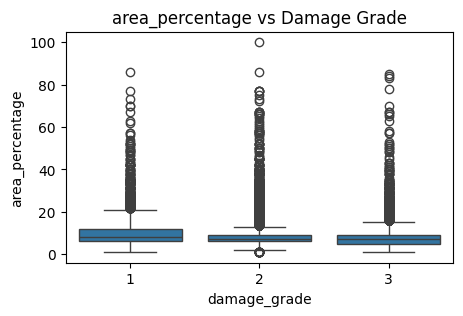

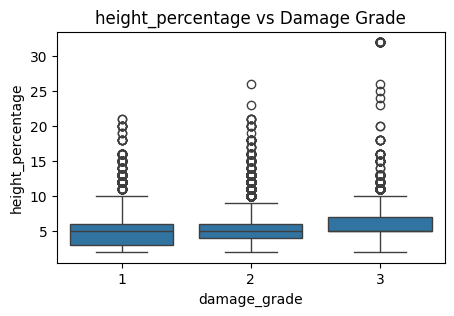

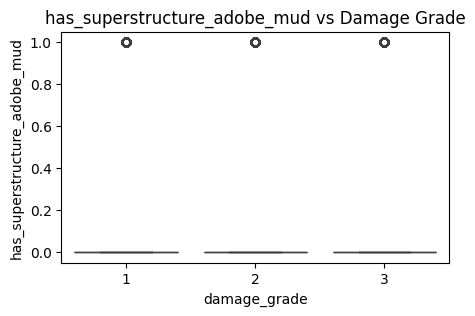

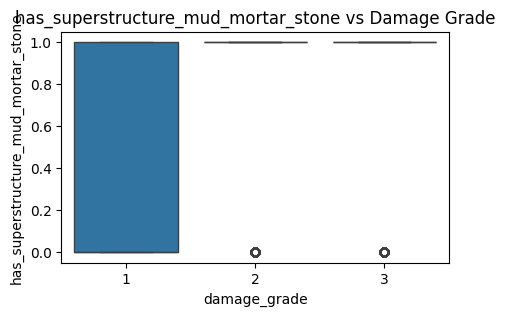

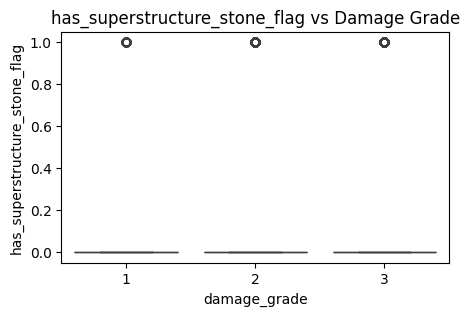

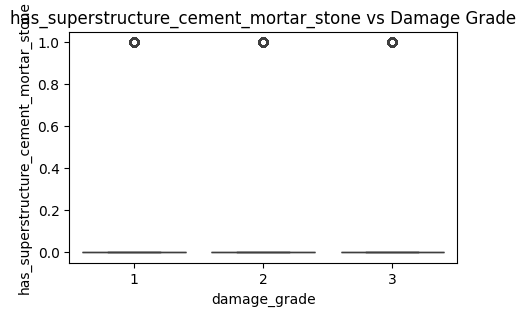

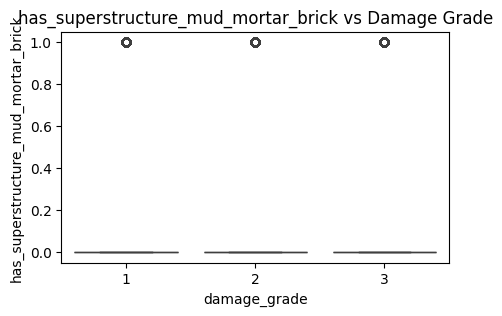

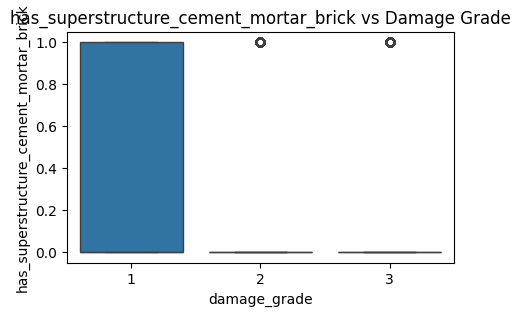

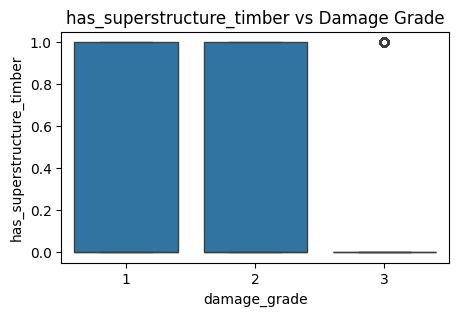

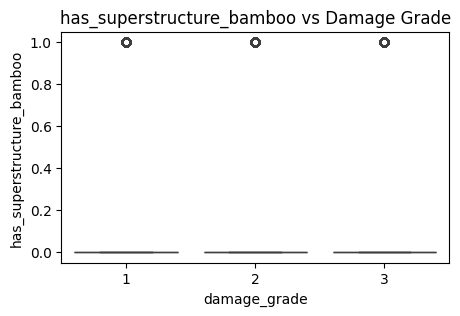

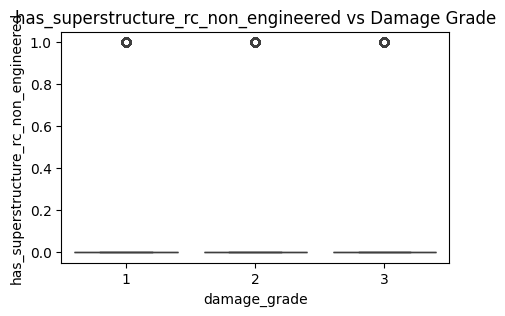

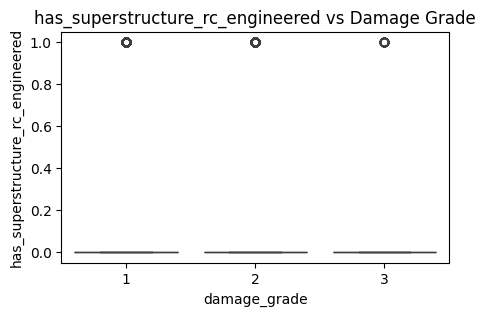

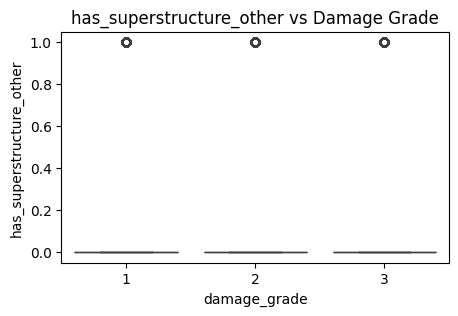

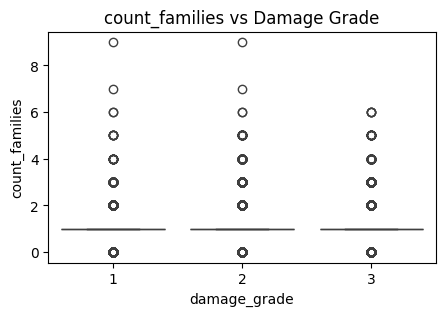

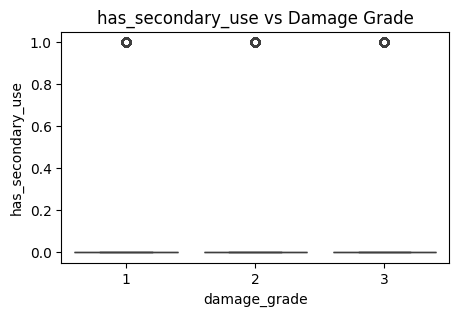

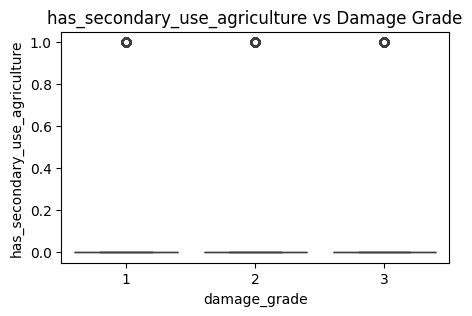

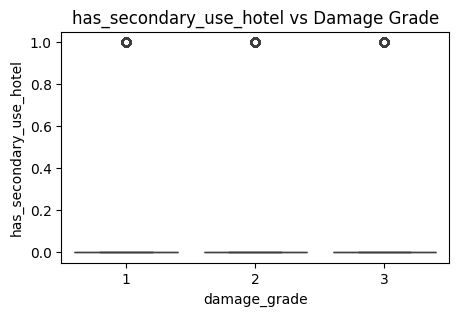

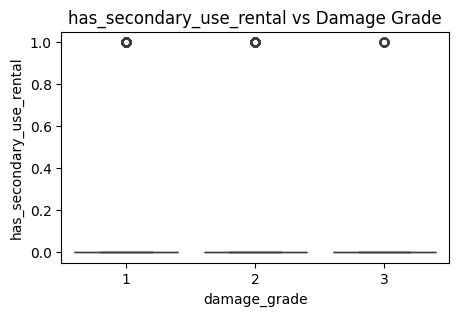

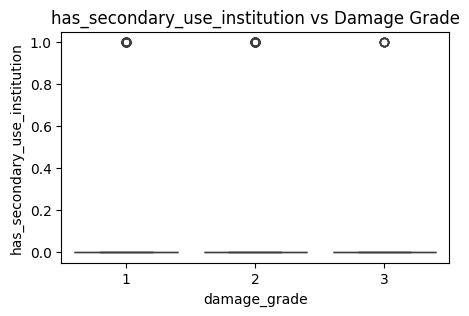

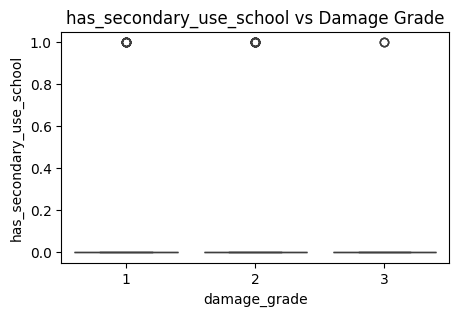

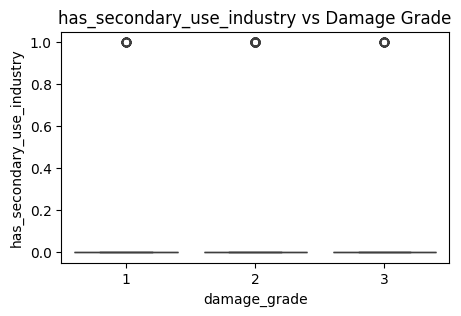

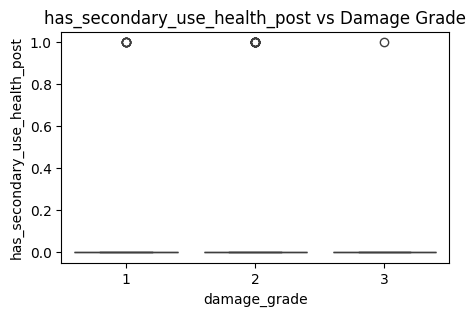

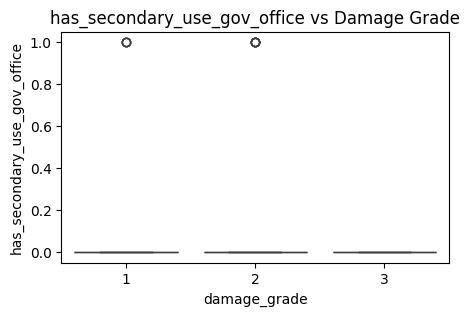

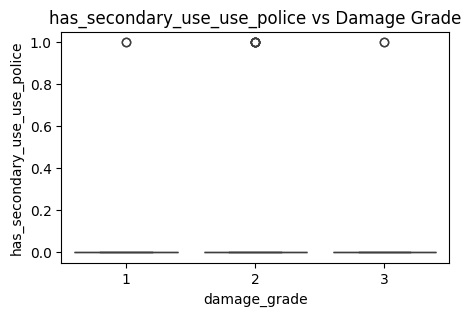

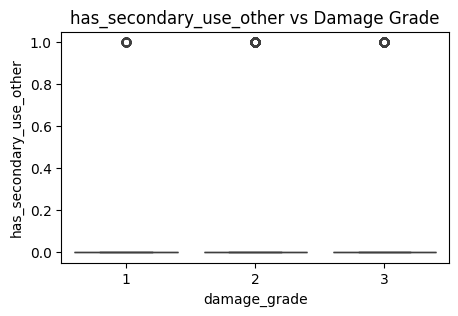

In [12]:
for col in numeric_cols:
    plt.figure(figsize=(5,3))
    sns.boxplot(data=df, x='damage_grade', y=col)
    plt.title(f"{col} vs Damage Grade")
    plt.show()


## ***Categorical vs Damage Grade***

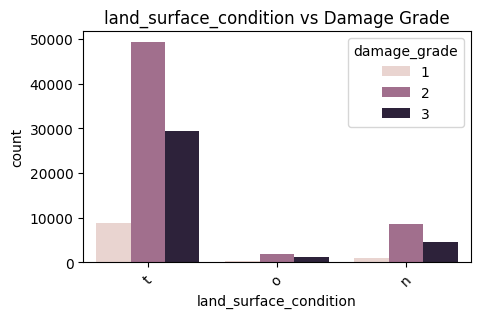

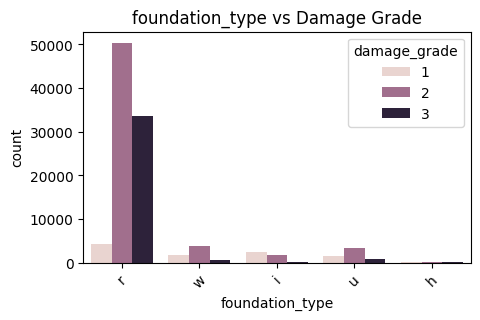

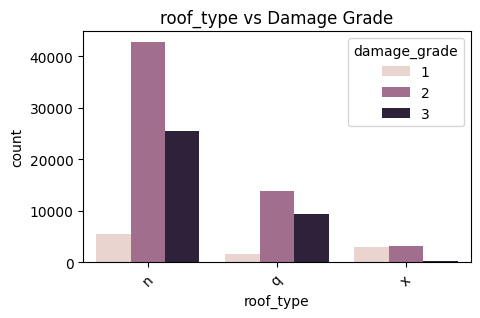

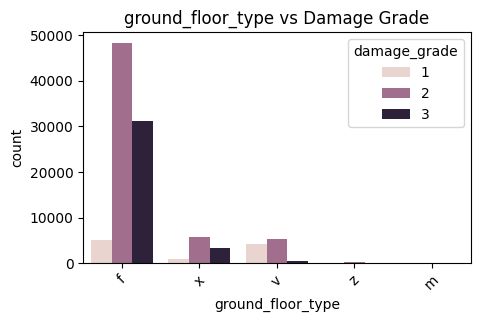

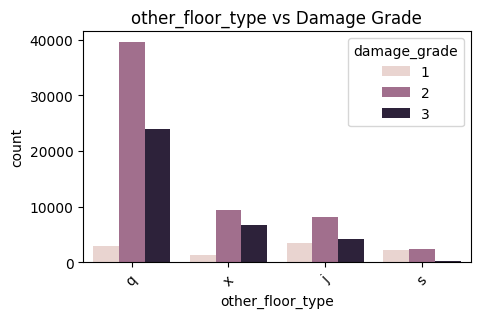

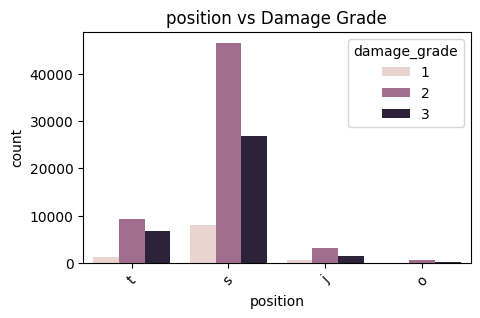

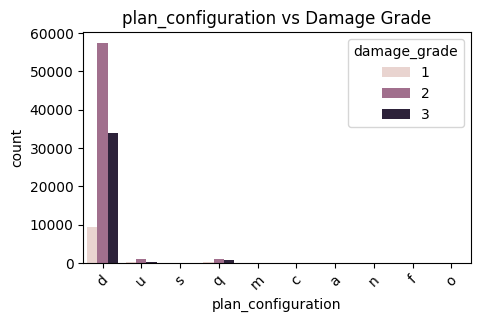

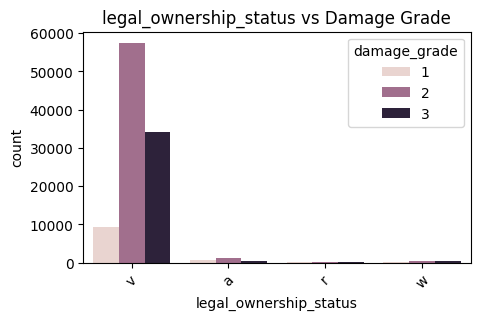

In [13]:
for col in categorical_cols:
    plt.figure(figsize=(5,3))
    sns.countplot(data=df, x=col, hue='damage_grade')
    plt.title(f"{col} vs Damage Grade")
    plt.xticks(rotation=45)
    plt.show()

## ***Correlation Analysis***

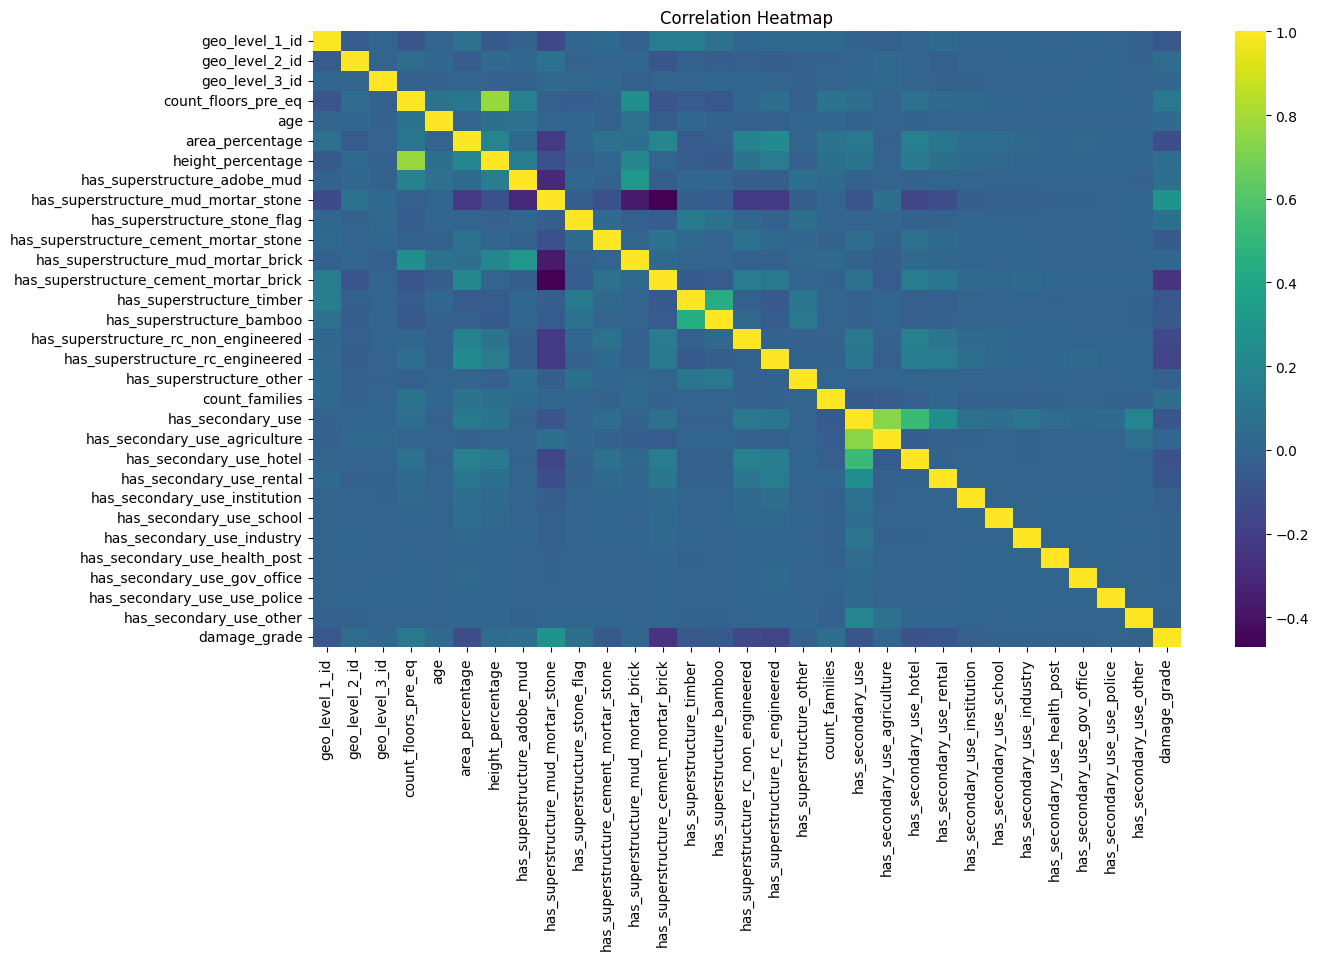

In [14]:
# Correlation Heatmap

plt.figure(figsize=(14,8))
corr = df[numeric_cols + ['damage_grade']].corr()
sns.heatmap(corr, annot=False, cmap="viridis")
plt.title("Correlation Heatmap")
plt.show()


In [15]:
df[numeric_cols + ['damage_grade']].corr()['damage_grade'].sort_values(ascending=False)

,damage_grade
damage_grade,1.000000
has_superstructure_mud_mortar_stone,0.291615
count_floors_pre_eq,0.121170
has_superstructure_stone_flag,0.063311
count_families,0.057369
has_superstructure_adobe_mud,0.052045
height_percentage,0.047305
geo_level_2_id,0.042071
age,0.030886
has_secondary_use_agriculture,0.013684


# ***EDA Summary & Findings***
- Material-based structures strongly influence damage.  
- Older and taller buildings → more damage.  
- Engineered RC structures show lowest damage.  
- Mud/adobe structures show highest damage.  
- Some geo regions show higher grade-3 density.  


# **DATA PREPROCESSING**

## ***Data Cleaning & Preprocessing***
We perform:
- Outlier detection  
- Outlier capping  
- Encoding  
- Feature engineering  
- Handling missing values

## ***Outlier Check***

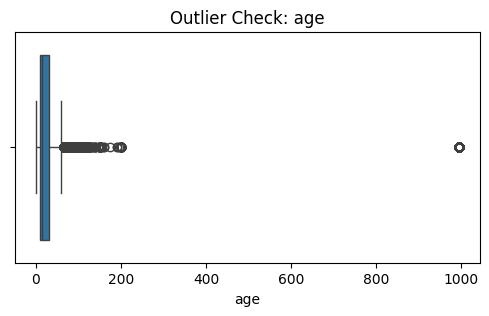

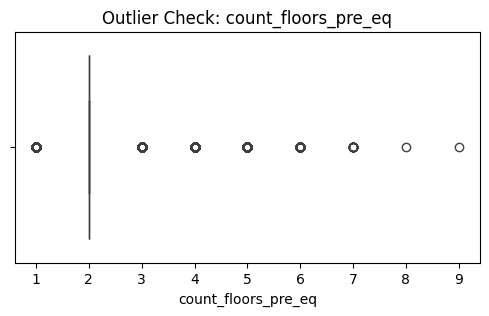

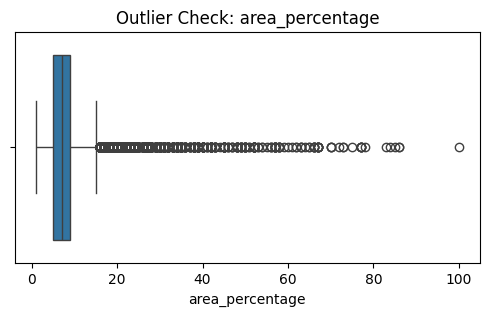

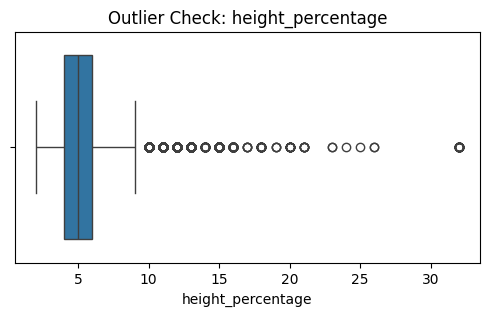

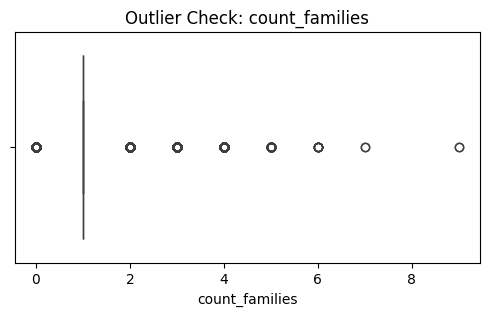

,age,count_floors_pre_eq,area_percentage,height_percentage,count_families
count,104903.000000,104903.000000,104903.000000,104903.000000,104902.000000
mean,26.299057,2.129100,8.022383,5.438681,0.985301
std,72.012400,0.727582,4.409739,1.927860,0.417117
min,0.000000,1.000000,1.000000,2.000000,0.000000
25%,10.000000,2.000000,5.000000,4.000000,1.000000
50%,15.000000,2.000000,7.000000,5.000000,1.000000
75%,30.000000,2.000000,9.000000,6.000000,1.000000
max,995.000000,9.000000,100.000000,32.000000,9.000000


In [16]:
# Outlier Checking

numeric_cols_to_check = ['age', 'count_floors_pre_eq', 'area_percentage', 'height_percentage', 'count_families']

for col in numeric_cols_to_check:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f'Outlier Check: {col}')
    plt.show()

# Summary statistics for decision making
df[numeric_cols_to_check].describe()


## ***Outlier Fixing***

In [17]:
# Outlier Treatment (IQR Capping)

def cap_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])
    return df

numeric_cols_to_fix = ['age', 'count_floors_pre_eq', 'area_percentage', 'height_percentage', 'count_families']

for col in numeric_cols_to_fix:
    df = cap_outliers(df, col)

print("Outlier capping complete!")
df[numeric_cols_to_fix].describe()


Outlier capping complete!


,age,count_floors_pre_eq,area_percentage,height_percentage,count_families
count,104903.000000,104903.0,104903.000000,104903.000000,104902.0
mean,20.479538,2.0,7.710075,5.364175,1.0
std,16.323767,0.0,3.192478,1.657852,0.0
min,0.000000,2.0,1.000000,2.000000,1.0
25%,10.000000,2.0,5.000000,4.000000,1.0
50%,15.000000,2.0,7.000000,5.000000,1.0
75%,30.000000,2.0,9.000000,6.000000,1.0
max,60.000000,2.0,15.000000,9.000000,1.0


## **Categorical Encoding**
We use:
- One-hot encoding  
- Frequency encoding  
- Binary flag encoding  


In [18]:
# CATEGORICAL ENCODING

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()

# ---------- 1) One-Hot Encode Low-Cardinality Columns ----------
low_cardinality_cols = [
    'land_surface_condition', 'foundation_type', 'roof_type',
    'ground_floor_type', 'other_floor_type', 'position',
    'plan_configuration', 'legal_ownership_status'
]

df_encoded = pd.get_dummies(df_encoded, columns=low_cardinality_cols, drop_first=True)


# ---------- 2) Frequency Encode High-Cardinality Columns ----------
high_cardinality_cols = ['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id']

for col in high_cardinality_cols:
    freq_map = df_encoded[col].value_counts()
    df_encoded[col] = df_encoded[col].map(freq_map)


# ---------- 3) Encode All Binary Columns Automatically ----------
binary_cols = [col for col in df_encoded.columns if df_encoded[col].nunique() == 2 and df_encoded[col].dtype == 'object']

for col in binary_cols:
    df_encoded[col] = df_encoded[col].map({'yes': 1, 'no': 0})


print("Encoding complete!")
df_encoded.head()


Encoding complete!


,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,802906,9857,117,21,2.0,30.0,6.0,5.0,1.0,1.0,...,False,False,False,False,False,False,False,False,True,False
1,28830,7662,87,7,2.0,10.0,8.0,7.0,0.0,1.0,...,False,False,False,False,False,False,False,False,True,False
2,94947,6039,737,55,2.0,10.0,5.0,5.0,0.0,1.0,...,False,False,False,False,False,False,False,False,True,False
3,590882,2522,80,14,2.0,10.0,6.0,5.0,0.0,1.0,...,False,False,False,False,False,False,False,False,True,False
4,201944,3345,418,42,2.0,30.0,8.0,9.0,1.0,0.0,...,False,False,False,False,False,False,False,False,True,False


## **Feature Engineering**
New features created:
- floors_to_height_ratio  
- area_to_height_ratio  
- total_superstructures  
- age_bucket  
- secondary_use_count  


In [19]:
# STEP 4 - FEATURE ENGINEERING

df_fe = df_encoded.copy()

# ---------- 1. Floors-to-height ratio ----------
df_fe['floors_to_height_ratio'] = df_fe['count_floors_pre_eq'] / (df_fe['height_percentage'] + 1)

# ---------- 2. Area-to-height ratio ----------
df_fe['area_to_height_ratio'] = df_fe['area_percentage'] / (df_fe['height_percentage'] + 1)

# ---------- 3. Count total superstructure materials ----------
superstructure_cols = [col for col in df_fe.columns if 'has_superstructure' in col]
df_fe['total_superstructures'] = df_fe[superstructure_cols].sum(axis=1)

# ---------- 4. Engineered vs Non-engineered RC ----------
if 'has_superstructure_rc_engineered' in df_fe.columns and 'has_superstructure_rc_non_engineered' in df_fe.columns:
    df_fe['is_rc_engineered'] = df_fe['has_superstructure_rc_engineered']
    df_fe['is_rc_non_engineered'] = df_fe['has_superstructure_rc_non_engineered']

# ---------- 5. Age buckets ----------
df_fe['age_bucket'] = pd.cut(df_fe['age'],
                             bins=[-1, 10, 25, 40, 200],
                             labels=['0-10', '10-25', '25-40', '40+'])

# Convert age_bucket to numeric
df_fe['age_bucket'] = df_fe['age_bucket'].astype('category').cat.codes

# ---------- 6. Secondary use count ----------
secondary_use_cols = [col for col in df_fe.columns if 'has_secondary_use' in col]
df_fe['secondary_use_count'] = df_fe[secondary_use_cols].sum(axis=1)

print("Feature engineering completed!")
df_fe.head()


Feature engineering completed!


,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w,floors_to_height_ratio,area_to_height_ratio,total_superstructures,is_rc_engineered,is_rc_non_engineered,age_bucket,secondary_use_count
0,802906,9857,117,21,2.0,30.0,6.0,5.0,1.0,1.0,...,False,True,False,0.333333,1.000000,2.0,0.0,0.0,2,0.0
1,28830,7662,87,7,2.0,10.0,8.0,7.0,0.0,1.0,...,False,True,False,0.250000,1.000000,1.0,0.0,0.0,0,0.0
2,94947,6039,737,55,2.0,10.0,5.0,5.0,0.0,1.0,...,False,True,False,0.333333,0.833333,1.0,0.0,0.0,0,0.0
3,590882,2522,80,14,2.0,10.0,6.0,5.0,0.0,1.0,...,False,True,False,0.333333,1.000000,3.0,0.0,0.0,0,0.0
4,201944,3345,418,42,2.0,30.0,8.0,9.0,1.0,0.0,...,False,True,False,0.200000,0.800000,1.0,0.0,0.0,2,0.0


## ***Fix Missing Values After Encoding***


In [20]:
# STEP FIX-M1: Handle any leftover NaN values

# Fill numeric columns with median
for col in df_fe.select_dtypes(include=['int64','float64']).columns:
    df_fe[col] = df_fe[col].fillna(df_fe[col].median())

# Fill categorical (encoded) columns with mode
for col in df_fe.select_dtypes(include=['object']).columns:
    df_fe[col] = df_fe[col].fillna(df_fe[col].mode()[0])

print("All missing values have been filled.")
print(df_fe.isnull().sum().sum(), "total NaNs remaining")


All missing values have been filled.
0 total NaNs remaining


## ***Train-Test Split & Scaling***

In [21]:
# STEP 5 - TRAIN TEST SPLIT + OPTIONAL SCALING

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df_fe.drop(['damage_grade', 'building_id'], axis=1)
y = df_fe['damage_grade']

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Scaling
numeric_cols = X.select_dtypes(include=['int64','float64']).columns

scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

print("Split + Scaling re-done successfully")


Split + Scaling re-done successfully


## **MODEL TRAINING**

# Predictive Modeling for damage_grade
We train multiple models:
- Logistic Regression  
- Decision Tree  
- Random Forest  
- XGBoost  
- LightGBM  
- CatBoost  

Evaluation Metrics:
- Accuracy  
- Macro F1 Score  
- Classification Report  


## ***Model 1: Logistic Regression (Baseline) Model***

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, f1_score

lr_model = LogisticRegression(max_iter=200)

# Train on scaled data (because LR needs scaling)
lr_model.fit(X_train_scaled, y_train)

# Predict
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluation
print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Macro F1 Score:", f1_score(y_test, y_pred_lr, average='macro'))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))


Logistic Regression Results:
Accuracy: 0.5838615890567657
Macro F1 Score: 0.4716376057763278

Classification Report:
              precision    recall  f1-score   support

           1       0.56      0.29      0.39      2014
           2       0.60      0.83      0.70     11925
           3       0.51      0.25      0.33      7042

    accuracy                           0.58     20981
   macro avg       0.56      0.46      0.47     20981
weighted avg       0.57      0.58      0.54     20981



## ***Model 2: Decision Tree Classifier***

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

dt_model = DecisionTreeClassifier(
    max_depth=20,         # controls tree depth to avoid heavy overfitting
    min_samples_split=10, # ensures splits have enough data
    random_state=42
)

# Train on unscaled data (tree models do not need scaling)
dt_model.fit(X_train, y_train)

# Predict
y_pred_dt = dt_model.predict(X_test)

# Evaluation
print("Decision Tree Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Macro F1 Score:", f1_score(y_test, y_pred_dt, average='macro'))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))


Decision Tree Results:
Accuracy: 0.670082455555026
Macro F1 Score: 0.6077929945322076

Classification Report:
              precision    recall  f1-score   support

           1       0.49      0.46      0.48      2014
           2       0.70      0.76      0.73     11925
           3       0.65      0.58      0.62      7042

    accuracy                           0.67     20981
   macro avg       0.62      0.60      0.61     20981
weighted avg       0.67      0.67      0.67     20981



## ***Model 3: Random Forest Classifier***

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

rf_model = RandomForestClassifier(
    n_estimators=200,        # number of trees
    max_depth=25,           # prevent too deep trees
    min_samples_split=10,   # reduce overfitting
    n_jobs=-1,              # use all CPU cores
    random_state=42
)

# Train
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Macro F1 Score:", f1_score(y_test, y_pred_rf, average='macro'))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Results:
Accuracy: 0.7013965015966828
Macro F1 Score: 0.6230462428112371

Classification Report:
              precision    recall  f1-score   support

           1       0.67      0.38      0.48      2014
           2       0.70      0.85      0.76     11925
           3       0.72      0.55      0.62      7042

    accuracy                           0.70     20981
   macro avg       0.69      0.59      0.62     20981
weighted avg       0.70      0.70      0.69     20981



In [25]:
import pandas as pd

rf_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
rf_importances.sort_values(ascending=False).head(20)


,0
geo_level_1_id,0.172338
geo_level_2_id,0.122521
geo_level_3_id,0.091356
area_to_height_ratio,0.062670
age,0.051218
area_percentage,0.049522
height_percentage,0.032211
floors_to_height_ratio,0.031784
foundation_type_r,0.027036
has_superstructure_mud_mortar_stone,0.025190


## ***Model 4: XGBoost Classifier***

In [26]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

xgb_model = XGBClassifier(
    n_estimators=300,        # number of trees
    learning_rate=0.05,     # small learning rate = better accuracy
    max_depth=10,
    subsample=0.8,          # prevent overfitting
    colsample_bytree=0.8,   # feature sampling
    objective='multi:softmax',
    num_class=4,            # classes = 1,2,3 → 3 classes, BUT XGBoost requires 0 to num_class-1.
    random_state=42,
    n_jobs=-1
)

# BUT IMPORTANT: convert target to 0,1,2 for XGBoost
y_train_xgb = y_train - 1
y_test_xgb = y_test - 1

# Train XGBoost
xgb_model.fit(X_train, y_train_xgb)

# Predict
y_pred_xgb = xgb_model.predict(X_test)

# Convert predictions back to 1,2,3
y_pred_xgb = y_pred_xgb + 1

# Evaluation
print("XGBoost Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Macro F1 Score:", f1_score(y_test, y_pred_xgb, average='macro'))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))


XGBoost Results:
Accuracy: 0.7244649921357419
Macro F1 Score: 0.6609580594934039

Classification Report:
              precision    recall  f1-score   support

           1       0.67      0.45      0.54      2014
           2       0.72      0.84      0.78     11925
           3       0.74      0.61      0.67      7042

    accuracy                           0.72     20981
   macro avg       0.71      0.63      0.66     20981
weighted avg       0.72      0.72      0.72     20981



## ***Model 5: LightGBM Classifier***

In [27]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

lgbm_model = LGBMClassifier(
    n_estimators=400,
    learning_rate=0.05,
    max_depth=-1,
    num_leaves=50,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Train
lgbm_model.fit(X_train, y_train)

# Predict
y_pred_lgbm = lgbm_model.predict(X_test)

# Evaluation
print("LightGBM Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_lgbm))
print("Macro F1 Score:", f1_score(y_test, y_pred_lgbm, average='macro'))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lgbm))


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.044924 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 633
[LightGBM] [Info] Number of data points in the train set: 83922, number of used features: 59
[LightGBM] [Info] Start training from score -2.343595
[LightGBM] [Info] Start training from score -0.564977
[LightGBM] [Info] Start training from score -1.091701
LightGBM Results:
Accuracy: 0.7194128020590058
Macro F1 Score: 0.65381729874714

Classification Report:
              precision    recall  f1-score   support

           1       0.67      0.44      0.53      2014
           2       0.72      0.84      0.78     11925
           3       0.73      0.59      0.66      7042

    accuracy                           0.72     20981
   macro avg       0.71      0.62      0.65     20981
weighted avg       0.72      0.72      0.71     20981



## ***Model 6: CatBoost Classifier***

In [28]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

cat_model = CatBoostClassifier(
    iterations=400,
    learning_rate=0.05,
    depth=10,
    loss_function='MultiClass',
    random_seed=42,
    verbose=0  # turn off training logs
)

# Train CatBoost
cat_model.fit(X_train, y_train)

# Predict
y_pred_cat = cat_model.predict(X_test)
y_pred_cat = y_pred_cat.flatten()  # ensure 1D output

# Evaluation
print("CatBoost Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_cat))
print("Macro F1 Score:", f1_score(y_test, y_pred_cat, average='macro'))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_cat))


CatBoost Results:
Accuracy: 0.7039702588055861
Macro F1 Score: 0.6287576796413287

Classification Report:
              precision    recall  f1-score   support

           1       0.67      0.39      0.49      2014
           2       0.70      0.84      0.77     11925
           3       0.72      0.55      0.63      7042

    accuracy                           0.70     20981
   macro avg       0.70      0.60      0.63     20981
weighted avg       0.70      0.70      0.69     20981



# **MODEL COMPARISON REPORT**

## ***Model Comparison Report***
We compile the accuracy and macro-F1 of all models to identify the best-performing model.


In [32]:
# ============================================
# 📊 FINAL MODEL COMPARISON TABLE (Fix)
# ============================================

results_df = pd.DataFrame({
    "Model": [
        "Logistic Regression",
        "Decision Tree",
        "Random Forest",
        "XGBoost",
        "LightGBM",
        "CatBoost"
    ],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_xgb),
        accuracy_score(y_test, y_pred_lgbm),
        accuracy_score(y_test, y_pred_cat)
    ],
    "Macro F1 Score": [
        f1_score(y_test, y_pred_lr, average='macro'),
        f1_score(y_test, y_pred_dt, average='macro'),
        f1_score(y_test, y_pred_rf, average='macro'),
        f1_score(y_test, y_pred_xgb, average='macro'),
        f1_score(y_test, y_pred_lgbm, average='macro'),
        f1_score(y_test, y_pred_cat, average='macro')
    ]
})

print("Model Comparison Table:")
results_df

Model Comparison Table:


,Model,Accuracy,Macro F1 Score
0,Logistic Regression,0.583862,0.471638
1,Decision Tree,0.670082,0.607793
2,Random Forest,0.701397,0.623046
3,XGBoost,0.724465,0.660958
4,LightGBM,0.719413,0.653817
5,CatBoost,0.703970,0.628758


In [33]:
results_df.style.background_gradient(cmap="Blues").set_properties(**{"font-size": "12pt"})

,Model,Accuracy,Macro F1 Score
0,Logistic Regression,0.583862,0.471638
1,Decision Tree,0.670082,0.607793
2,Random Forest,0.701397,0.623046
3,XGBoost,0.724465,0.660958
4,LightGBM,0.719413,0.653817
5,CatBoost,0.703970,0.628758


## **SUGGESTIONS FOR SEISMOLOGISTS**

## ***Recommendations for Seismologists***
Based on EDA & feature importance:
- Strengthen RC-engineered construction  
- Avoid mud, adobe, stone materials  
- Reduce building height, increase stabilization  
- Retrofit older buildings  
- Strengthen high-risk geographic zones  

# **CHALLENGES REPORT**

## ***Challenges Faced:***
- Outliers in height & area  
- High-cardinality geo features  
- Skewed distributions  
- Class imbalance  
- Correlated features  
- Large dataset (260k rows)

##***Solutions Used:***
- IQR capping  
- Frequency encoding  
- Stratified split  
- Macro F1 score  
- Tree-based models to handle collinearity  